In [1]:
import pandas as pd

wine_data = pd.read_csv('datasets/02/demos/data/winequality-white.csv',
                        names=['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
                               'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
                               'pH', 'Sulphates', 'Alcohol', 'Quality'],
                        skiprows=1, sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [3]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [4]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)


,penalty,'l1'
,loss,'squared_hinge'
,dual,False
,tol,0.001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [5]:
accuracy = clf_svc.score(X_test, Y_test)
print(accuracy)

0.49183673469387756


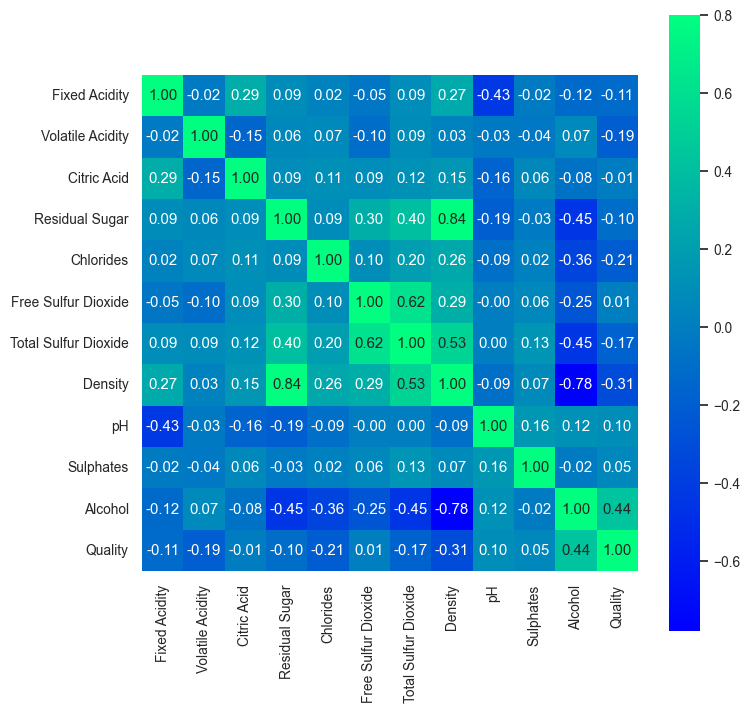

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax= plt.subplots(figsize=(8,8))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap= "winter")
plt.show()

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, whiten=True)
X_reduced = pca.fit_transform(X)

In [40]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334])

In [41]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496])

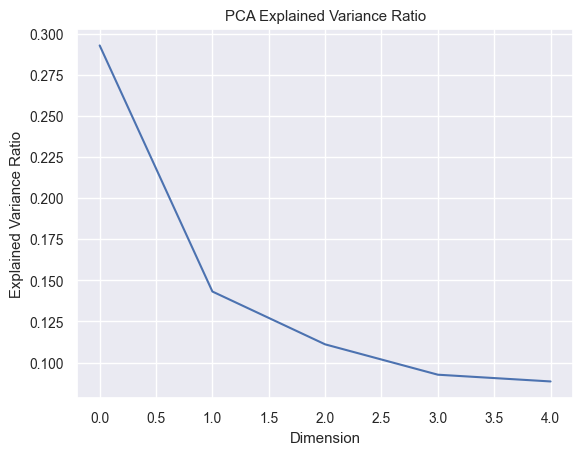

In [42]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)

clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)


,penalty,'l1'
,loss,'squared_hinge'
,dual,False
,tol,0.001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [44]:
accuracy = clf_svc_pca.score(X_test, Y_test)
print(accuracy)

0.45918367346938777
